In [1]:
import os

In [2]:
print(os.listdir('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset'))

['cats', 'dogs', 'horses', 'humans']


In [3]:
folders = os.listdir('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset')

In [4]:
folders

['cats', 'dogs', 'horses', 'humans']

In [5]:
path = 'C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/'
for i in folders:
    print(i, len(os.listdir(path + i)))

cats 181
dogs 181
horses 181
humans 181


In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
img = image.load_img('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/horses/horse-10.jpg')

In [8]:
img = image.img_to_array(img)/255

In [9]:
img.shape

(469, 540, 3)

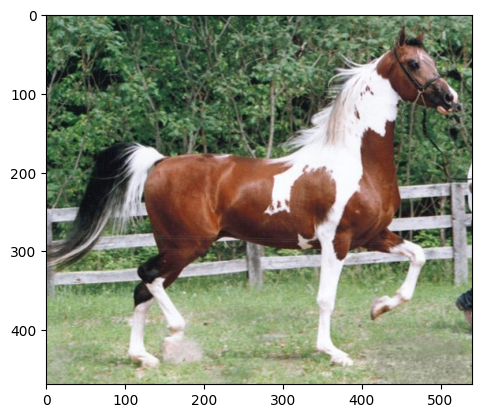

In [10]:
plt.imshow(img)

In [11]:
import keras 
import keras.layers as layers
from keras.models import Sequential

In [12]:
input_shape = (250, 250, 3)
num_classes = 4
model = keras.Sequential(
[
    keras.Input(shape = input_shape),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'), 
    layers.MaxPool2D(pool_size = (2, 2), strides=(1, 1)), 
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'), 
    layers.MaxPool2D(pool_size = (2, 2)), 
    layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'), 
    layers.MaxPool2D(pool_size = (2, 2)), 
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 247, 247, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 122, 122, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 128)       0

In [14]:
import tensorflow as tf
from keras import optimizers

In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_set = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

valid_set = ImageDataGenerator(rescale=1/255)

In [18]:
train_gen = train_set.flow_from_directory(path, 
                                         target_size = (250, 250), 
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [19]:
path_val = 'C:/Users/bhatt/OneDrive/Desktop/whisper-main/Val_dataset-20230906T164858Z-001/Val_dataset'

In [20]:
valid_gen = valid_set.flow_from_directory(path_val, 
                                         target_size = (250, 250), 
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 84 images belonging to 4 classes.


In [21]:
for i, j in train_gen:
    print(i.shape, j.shape)
    break

(32, 250, 250, 3) (32, 4)


In [22]:
for i, j in valid_gen:
    print(i.shape, j.shape)
    print(j)
    break

(32, 250, 250, 3) (32, 4)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


[0. 0. 0. 1.]


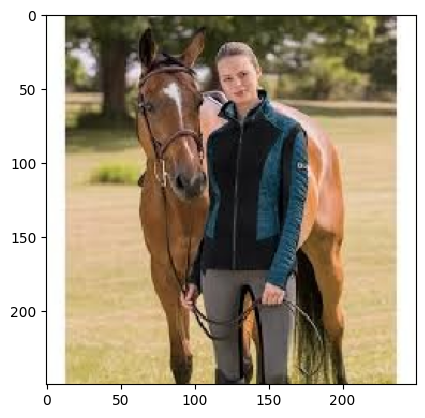

In [23]:
plt.imshow(i[-2])
print(j[-2])

In [24]:
hist = model.fit_generator(train_gen, epochs = 50, validation_data = valid_gen)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_30192\2068439457.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 100, validation_data = valid_gen)


Epoch 1/100
 1/23 [>.............................] - ETA: 23:42 - loss: 1.4152 - accuracy: 0.2500

KeyboardInterrupt: 

In [1]:
import torch

In [3]:
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

NVIDIA GeForce GTX 1650
